@[TOC](目录)

**复习：**回顾学习完第一章，我们对泰坦尼克号数据有了基本的了解，也学到了一些基本的统计方法，第二章中我们学习了数据的清理和重构，使得数据更加的易于理解；今天我们要学习的是第二章第三节：**数据可视化**，主要给大家介绍一下Python数据可视化库Matplotlib，在本章学习中，你也许会觉得数据很有趣。在打比赛的过程中，数据可视化可以让我们更好的看到每一个关键步骤的结果如何，可以用来优化方案，是一个很有用的技巧。

【分析】数据可视化可以让人非常直观的把握数据体现的规律。视觉是人类获取外界信息最高速，最主要也是最重要渠道。 超过50%的人脑功能用于视觉感知，而大脑接收到的信息 90％ 来自视觉，人类利用视觉获取和处理的信息量，远远超出其他途径。通过数据可视化能够很好的把数据隐含的信息传达给观众。

In [98]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 2 第二章：数据可视化

#### 开始之前，导入numpy、pandas以及matplotlib包和数据

In [132]:
# 加载所需的库
# 如果出现 ModuleNotFoundError: No module named 'xxxx'
# 你只需要在终端/cmd下 pip install xxxx 即可

%matplotlib inline # IPython notebook中的魔法方法，这样每次运行后可以直接得到图像，不再需要使用plt.show()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

【注意】%matplotlib inline，用在Jupyter notebook中具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在你的python console里面生成图像

In [6]:
#加载result.csv这个数据
text = pd.read_csv('result.csv')
text.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.7 如何让人一眼看懂你的数据？
《Python for Data Analysis》[^1]第九章  
[^1]:《Python for Data Analysis》

#### 2.7.1 任务一：跟着书本第九章，了解matplotlib，自己创建一个数据项，对其进行基本可视化

【思考】最基本的可视化图案有哪些？分别适用于那些场景？（比如折线图适合可视化某个属性值随时间变化的走势）

【思考回答】
这一部分需要了解可视化图案的的逻辑，知道什么样的图案可以表达什么样的信号
参考《Python for Data Analysis》，下面结合示例进行分析。

1. 折线图

E:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Age,Survived'>

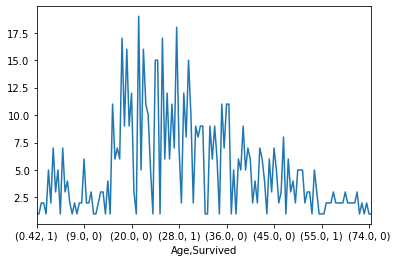

In [160]:
text.groupby(['Age'])['Survived'].value_counts().plot()

【分析】适合属性值随连续自变量变化的走势。

2. 柱状图

<AxesSubplot:>

Text(0.5, 0, 'SibSp')

Text(0, 0.5, 'Count')

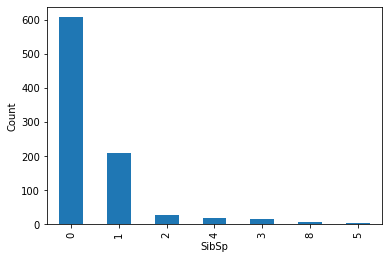

In [164]:
text.SibSp.value_counts().plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Count')

【分析】适合离散的特征值，利用value_counts图形化显示Series中各值的频数

3. 直方图和密度图

<AxesSubplot:ylabel='Frequency'>

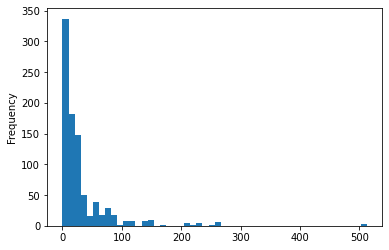

In [172]:
text['Fare'].plot.hist(bins=50)

<AxesSubplot:xlabel='Fare'>

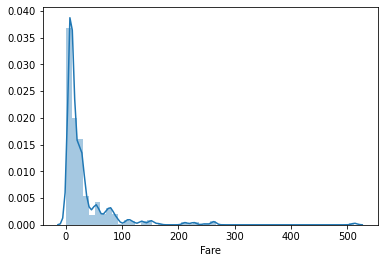

In [169]:
import seaborn as sns
sns.distplot(text['Fare'])

【分析】适合数值型，可以直观的体现特征变量的分布情况。可以看出票价呈右偏、长尾分布，低价票比较集中。

4. 热图和散点图

In [184]:
corrmat=text.corr()
corrmat['Survived'].abs().sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
Unnamed: 0     0.009635
PassengerId    0.005007
Name: Survived, dtype: float64

【分析】可以看出仓位等级与生存情况的关系最大。票价与生存情况的关系也比较大。

<AxesSubplot:>

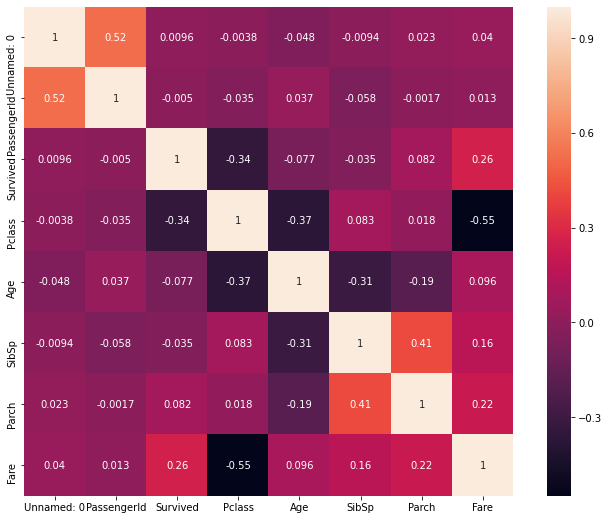

In [185]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True)

【分析】这个热图默认是第一个column，即默认的index来画的，看起来并没有什么用，我们关心的是Survived的相关情况。

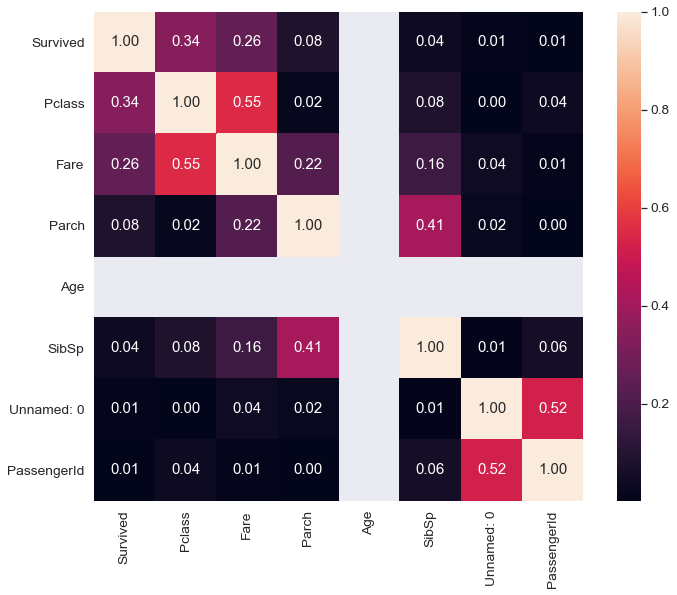

In [205]:
cols=corrmat.abs().nlargest(8,'Survived')['Survived'].index
cm=abs(np.corrcoef(text[cols].values.T))
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm,annot=True,square=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)

【分析】为啥Age相关的行列是空的？原来Age里面有缺失值，只要填充好缺失值就行了，填充完缺失值的df再按上面的步骤做一遍就好，具体就不演示了。可以看出Pclass和Survived的相关性最大。

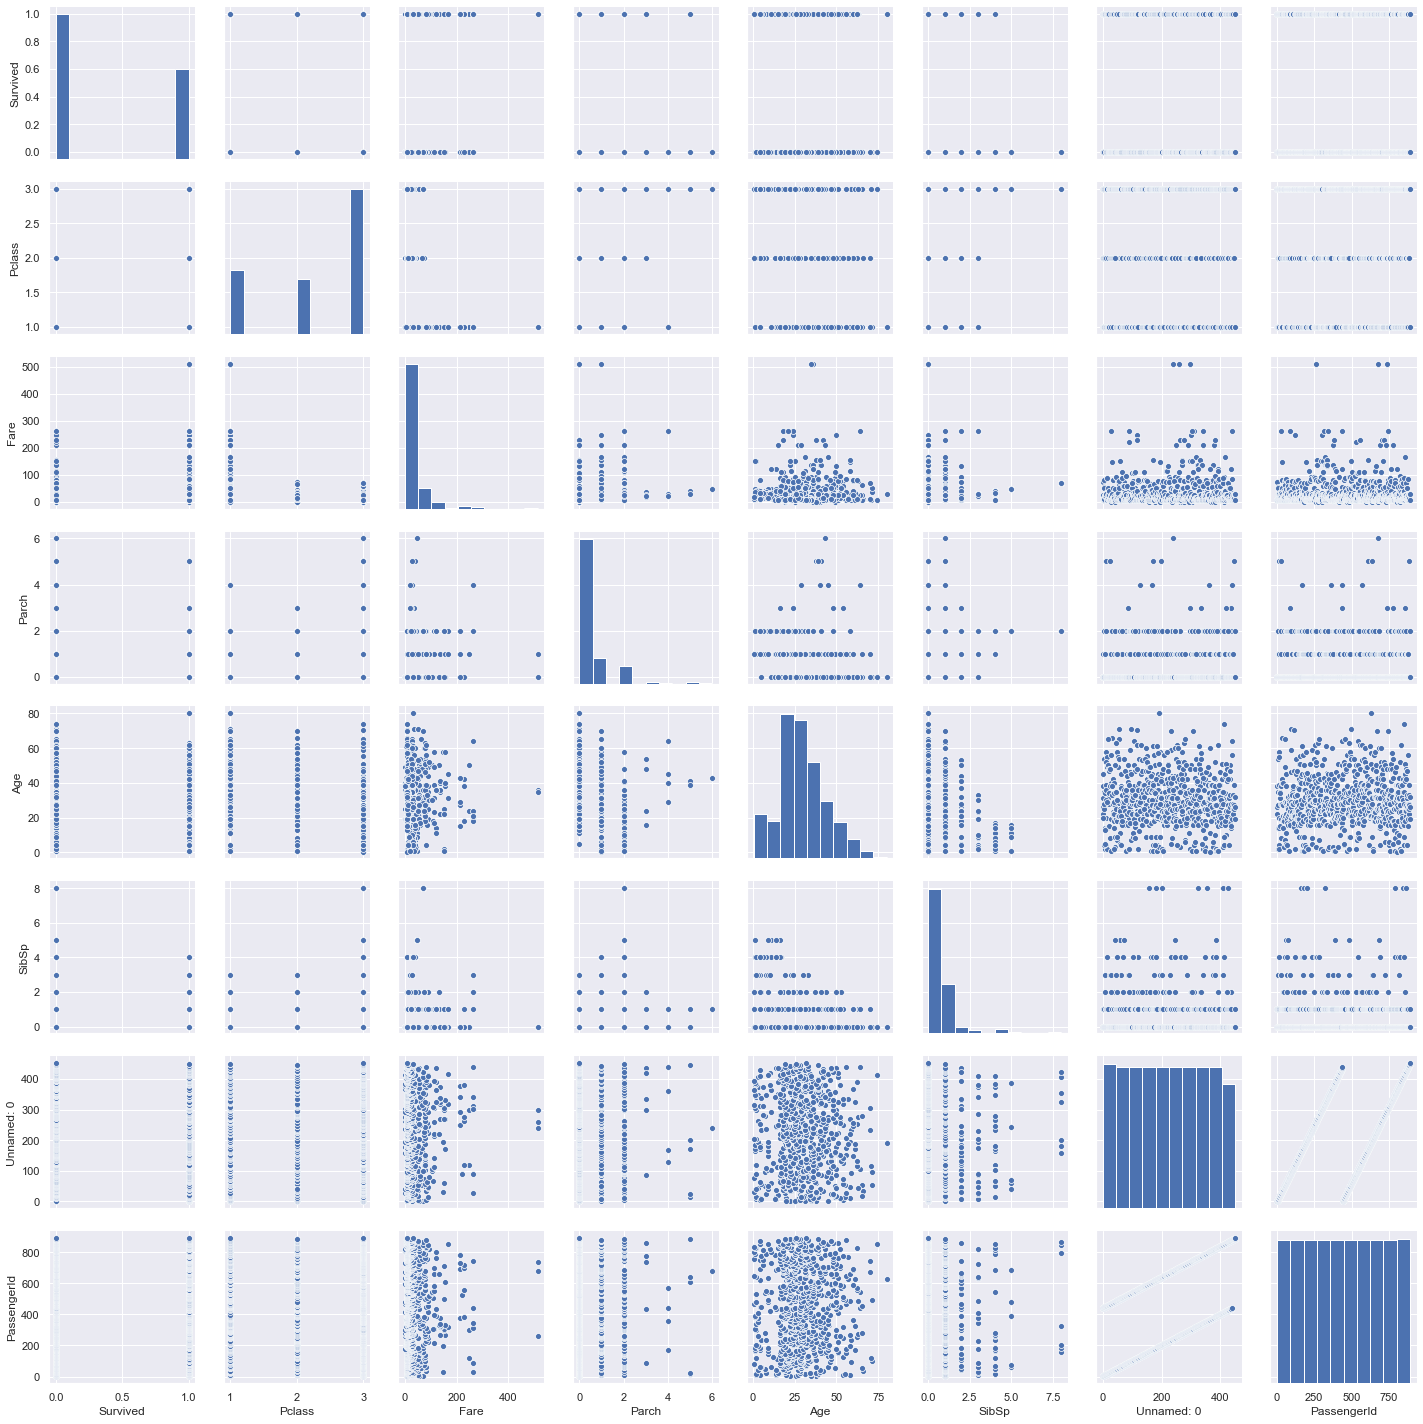

In [207]:
# seaborn提供了一个便捷的pairplot函数，支持在对角线上放置每个变量的直方图或密度估计
sns.set()
sns.pairplot(text[cols], height = 2.5)

【分析】效果不是很好，因为Survived是个二值的输出，如果是取值较多的或者连续型的，相关关系会更加明显。里面有许多散点图，可以直观的观察到它们的相关关系。

【参考】[https://seaborn.pydata.org/generated/seaborn.heatmap.html](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

5. 分面网格（facet grid）

【分析】由于下面例题有相关的演示，这里就不做了。主要适用于数据有额外的分组维度。多个分类变量的数据可视化的问题。

6. 饼图

<Figure size 720x720 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1f05cc64688>,
 [Text(-0.596335425299201, 0.9243289785207544, '0'),
  Text(0.3684052491933305, -1.1420497241218528, '1'),
  Text(1.0029980041727713, -0.45165806051197366, '2'),
  Text(1.0627689715338293, -0.28376418580385865, '4'),
  Text(1.089077888508049, -0.15462649437547848, '3'),
  Text(1.0980245143543599, -0.06589511269337359, '8'),
  Text(1.0998290643754833, -0.019391471190945954, '5')],
 [Text(-0.3252738683450187, 0.5041794428295023, '68.2%'),
  Text(0.21490306202944276, -0.6661956724044141, '23.5%'),
  Text(0.5470898204578751, -0.24635894209744014, '3.1%'),
  Text(0.5796921662911796, -0.15478046498392287, '2.0%'),
  Text(0.5940424846407539, -0.08434172420480643, '1.8%'),
  Text(0.5989224623751053, -0.035942788741840134, '0.8%'),
  Text(0.5999067623866272, -0.010577166104152338, '0.6%')])

Text(0.5, 1.0, 'SibSp_count')

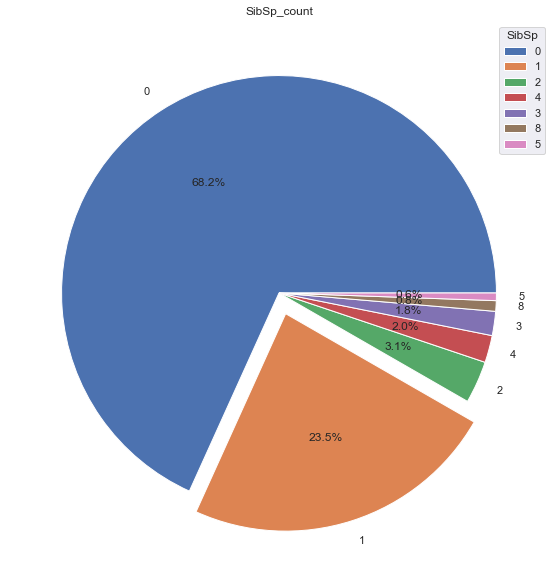

In [240]:
labels=text['SibSp'].value_counts().index.tolist()
count=text['SibSp'].value_counts().values.tolist()
explode = [0, 0.1, 0, 0, 0, 0, 0]
plt.figure(figsize=(10, 10))
plt.pie(count, explode = explode,labels = labels, autopct = '%3.1f%%')
plt.title('SibSp_count')
plt.legend(title='SibSp')

【分析】饼图能够直观显示分类数据的占比情况(占比)，如图突出了兄弟姐妹为1个的情况。这种图如果用在分类数据的市场占比的话不要太好用

【参考】[学习python库matplotlib之常见统计饼图pie(6)](https://blog.csdn.net/lbj1260200629/article/details/88425941)

#### 2.7.2 任务二：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）。

<AxesSubplot:xlabel='Sex'>

Text(0.5, 1.0, 'suvived_sex')

Text(0, 0.5, 'Count')

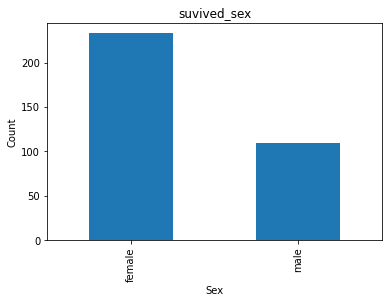

In [23]:
#代码编写
suvived_sex = text.groupby('Sex')['Survived'].sum()
suvived_sex.plot.bar()
plt.title('suvived_sex')
plt.ylabel('Count')

【思考】计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示？如何和男女生存人数可视化柱状图结合到一起？看到你的数据可视化，说说你的第一感受（比如：你一眼看出男生存活人数更多，那么性别可能会影响存活率）。

【思考题回答】



<AxesSubplot:>

Text(0.5, 1.0, 'died_sex')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Count')

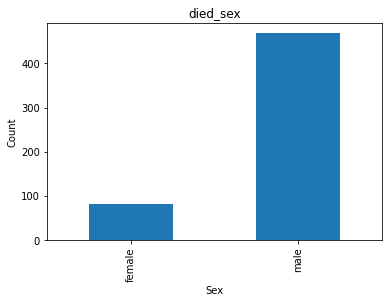

In [105]:
# 计算出泰坦尼克号数据集中男女中死亡人数，并可视化展示
died_sex=text.Sex[text.Survived==0].value_counts(ascending=True)
# sum_sex=text['Sex'].value_counts(ascending=True) #另一种方式，不同性别总人数-存活的人数
# died_sex=sum_sex-suvived_sex
died_sex.plot.bar()
plt.title('died_sex')
plt.xlabel('Sex')
plt.ylabel('Count')

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex,Survived'>

Text(0, 0.5, 'Count')

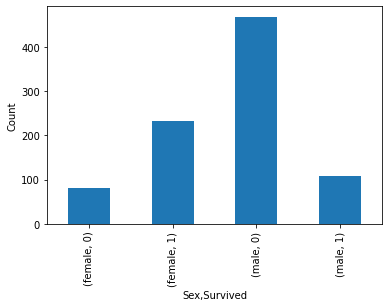

In [50]:
# 男女生存和死亡情况
count_sex = text.groupby('Sex')['Survived'].value_counts(sort=False)
count_sex
count_sex.plot.bar()
plt.ylabel('Count')

结论：通过数据可视化，我们可以看出男生存活人数较低，死亡人数高，女生则相反，性别可能会影响存活率

#### 2.7.3 任务三：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）。

<AxesSubplot:xlabel='Sex'>

Text(0.5, 1.0, 'survived_count')

Text(0, 0.5, 'Count')

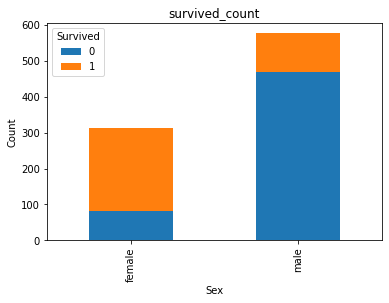

In [59]:
#代码编写
# 提示：计算男女中死亡人数 1表示生存，0表示死亡
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True') # 两个层次的索引，第一索引Sex，第二索引Survived
plt.title('survived_count')
plt.ylabel('Count')

【提示】男女这两个数据轴，存活和死亡人数按比例用柱状图表示

【分析】这个图与上图相比更直观的显示出男女生存的比例

<AxesSubplot:xlabel='Survived'>

Text(0.5, 1.0, 'survived_count')

Text(0, 0.5, 'Count')

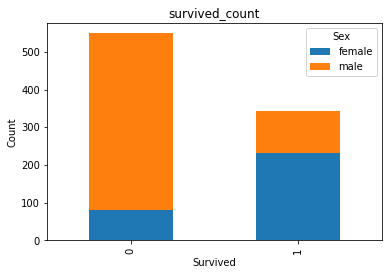

In [52]:
# 此图可以显示出死亡和生存人数中男女所占比例
text.groupby(['Survived','Sex'])['Survived'].count().unstack().plot(kind='bar',stacked='True') 
plt.title('survived_count')
plt.ylabel('Count')

#### 2.7.4 任务四：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

【提示】对于这种统计性质的且用折线表示的数据，你可以考虑将数据排序或者不排序来分别表示。看看你能发现什么？

Fare     Survived
8.0500   0           38
7.8958   0           37
13.0000  0           26
7.7500   0           22
26.0000  0           16
                     ..
20.2500  1            1
         0            1
18.7875  1            1
         0            1
15.0500  0            1
Name: Survived, Length: 330, dtype: int64

E:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Fare,Survived'>

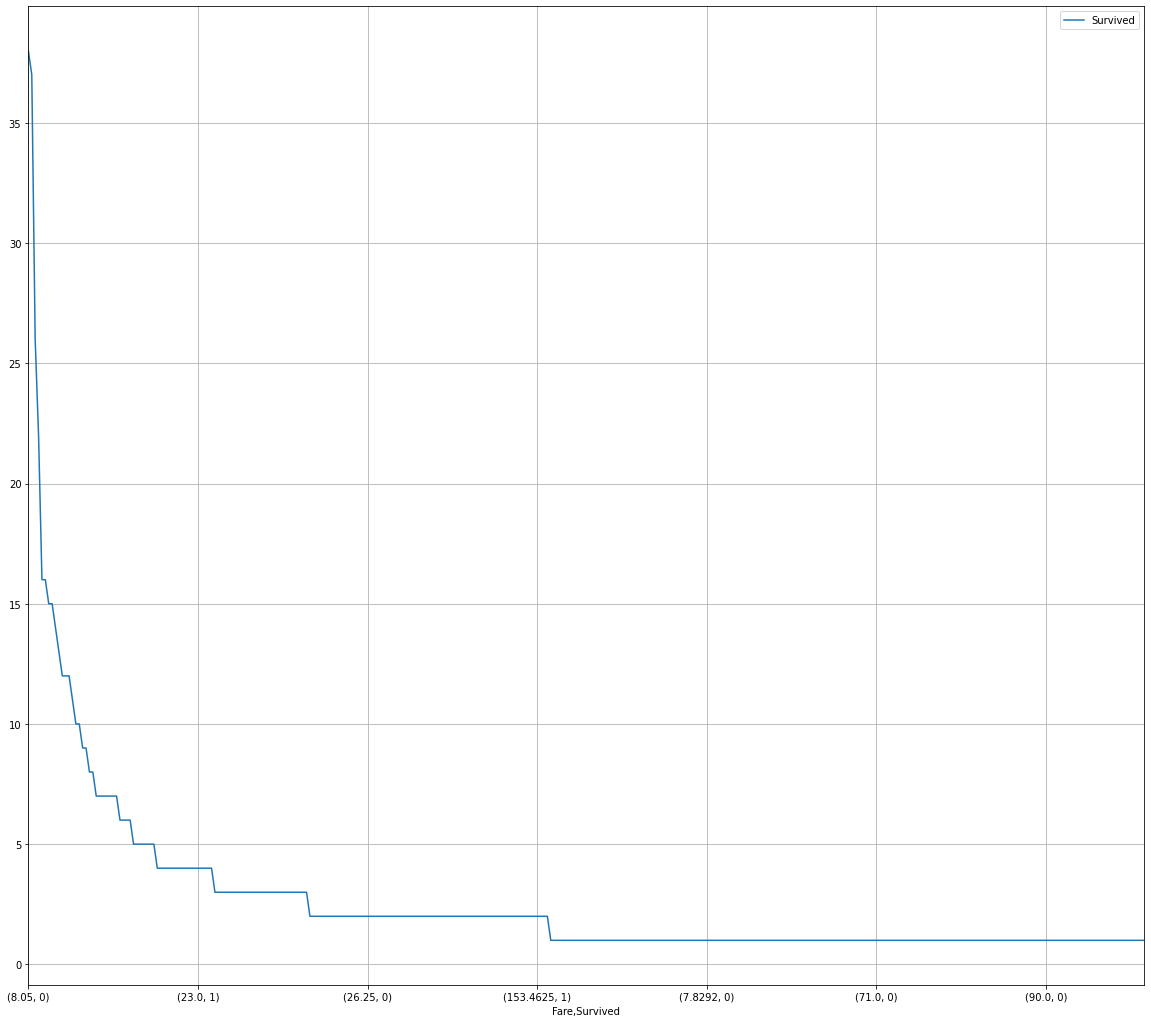

In [133]:
# 计算不同票价中生存与死亡人数 1表示生存，0表示死亡
# 1.数据排序
fare_survived = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fare_survived
fig = plt.figure(figsize=(20, 18))
fare_survived.plot(grid=True)
plt.legend()

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

E:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Fare,Survived'>

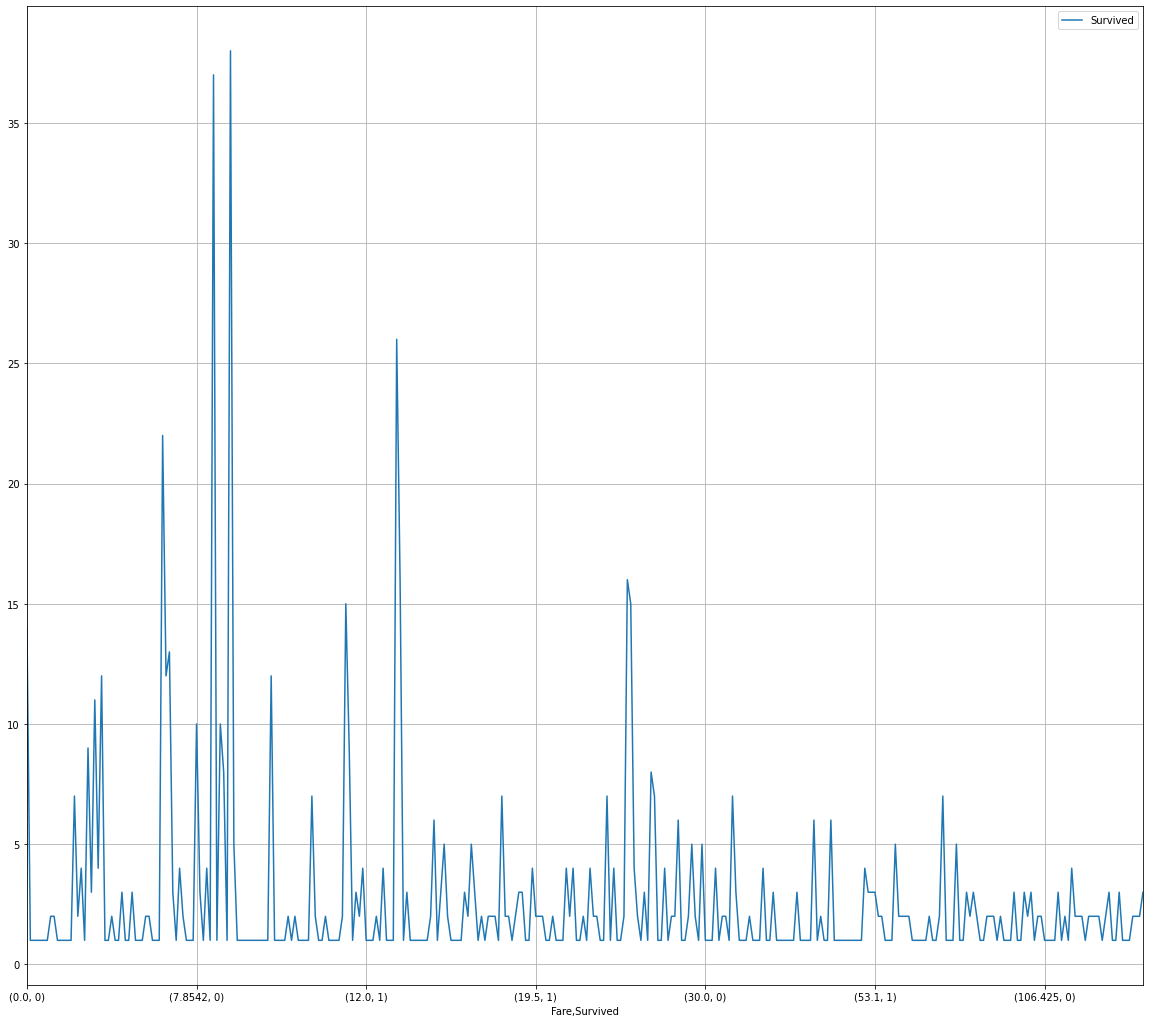

In [134]:
# 数据不排序
# 1.数据排序
fare_survived = text.groupby(['Fare'])['Survived'].value_counts()
fare_survived
fig = plt.figure(figsize=(20, 18))
fare_survived.plot(grid=True)
plt.legend()

#### 2.7.5 任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [87]:
#代码编写
# 1表示生存，0表示死亡
pclass_survived = text.groupby(['Pclass'])['Survived'].value_counts()
pclass_survived

<AxesSubplot:xlabel='Pclass'>

Text(0, 0.5, 'Count')

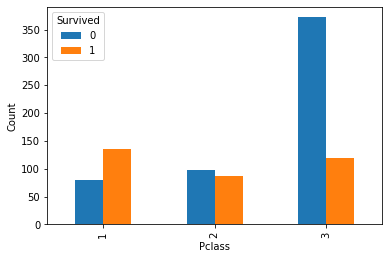

In [127]:
# 方法一 用pandas plot 的bar画图
pclass_survived.unstack().plot.bar()
plt.ylabel('Count')
# 或者这样处理
# pclass_survived.unstack().plot(kind='bar',stacked=True)
# plt.ylabel('Count')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

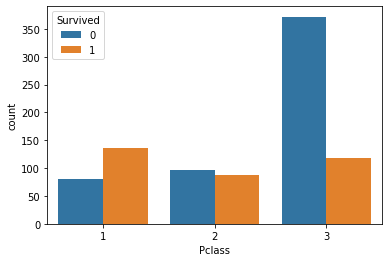

In [99]:
# 方法二 用seaborn countplot画图
import seaborn as sns
sns.countplot(x="Pclass",hue="Survived", data=text)
# 或者直接df[col]
# sns.countplot(x=text["Pclass"],hue=text["Survived"])

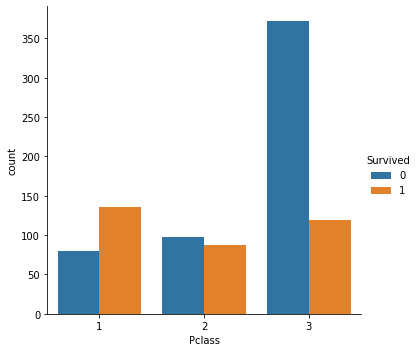

In [91]:
# 方法三 用seaborn catplot画图
sns.catplot(x="Pclass", hue="Survived", kind="count", data=text)

【参考】         [Seaborn教程](https://zhuanlan.zhihu.com/p/40303932)  
&emsp;&emsp;&emsp;&emsp;[sns.countplot() 画条形图](https://www.cnblogs.com/cgmcoding/p/13355748.html)

【思考】看到这个前面几个数据可视化，说说你的第一感受和你的总结

【思考题回答】从图中看，可以看出一等舱的存活比例更高，应该是有钱买高等舱的人地位相对更高，更容易优先被救



#### 2.7.6 任务六：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'age')

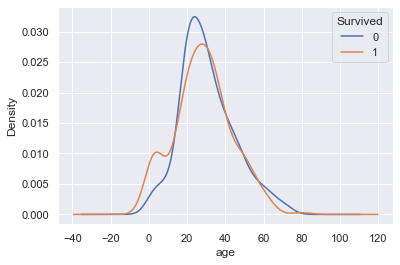

In [234]:
#方法一 plot方法
text.Age[text.Survived == 0].plot(kind='kde')
text.Age[text.Survived == 1].plot(kind='kde')
plt.xlabel("age")
plt.legend((0,1),title='Survived',loc="best")

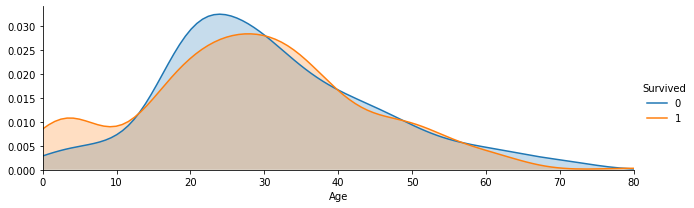

In [118]:
#方法二 sns.FacetGrid().map(sns.kedeplot)的方法
facet = sns.FacetGrid(text, hue="Survived",aspect=3) # 先sns.FacetGrid画出轮廓，子集变量为"Survived"，横纵轴比为3
facet.map(sns.kdeplot,'Age',shade= True) # 然后用map填充内容，方法是sns,kdeplot,kdeplot是核密度估计画图，有阴影
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()

【分析】从图中可以看出，乘客20-40岁区间的乘客最多，比较两条折线某一段的高低可以得出在该年龄段存活和死亡的相对情况，就本图而言，可以看出0-12岁左右获救的概率较高，可能逃生时要求先保护好儿童。55岁以上的死亡率更高，可能和老人的身体状况有关，老人身体更弱，更加难以救生。12-30岁这个区间的死亡率也比较高，从年龄一项推测出来的信息不多，可能要结合票价、船舱、性别情况多变量分析。

【扩展】
> class seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)
>
>参数  
>> data : DataFrame
>>> 处理后的（“长格式”）dataframe数据，其中每一列都是一个变量（特征），每一行都是一个样本
>>
>> row, col, hue : strings  
>>>定义数据子集的变量，这些变量将在网格的不同方面绘制。请参阅下面*_order参数以控制该变量的级别顺序
>>
>>col_wrap : int, optional  
>>>这个意思是图网格列维度限制，比如col_wrap =3，那么在这个画布里最多只能画3列。行不限制，这样就限制了列的个数。
>>
>> share{x,y} : bool, ‘col’, or ‘row’ optional
>>> 是否共享x轴或者y轴，就是说如果为真，就共享同一个轴，否则就不共享，默认是都共享，即都为True
>>
>> height : scalar, optional
>>>每个图片的高度设定，默认为3
>>
>> aspect : scalar, optional
>>> 文档说是纵横比，是说每个小图的横轴长度和纵轴的比
>>
>> palette : palette name, list, or dict, optional
>>> 一般在使用hue时来改变颜色的，有这几种系统给的可选deep, muted, bright, pastel, dark, colorblind
>>
>> {row,col,hue}_order : lists, optional
>>> 对所给命令的级别进行排序。默认情况下，这将是数据中显示的级别，如果变量是pandas分类，则是类别顺序。
>>
>> hue_kws : dictionary of param -> list of values mapping
>>> 其他关键字参数插入到绘图调用中，让其他绘图属性在色相变量的级别上有所不同
>>
>> legend_out : bool, optional
>>> 默认为True，legend是图例的意思，如果True，图形尺寸将被扩展，并且图例将被绘制在中心右侧的图形之外
>>
>> despine : boolean, optional
>>> 从图中移除顶部和右侧脊柱,就是边缘框架
>>
>> margin_titles : bool, optional
>>> 如果是真的，那么行变量的标题就会被绘制到最后一列的右边。这个选项是实验性的，在所有情况下都可能不起作用。
>>
>> {x, y}lim: tuples, optional
>>> 每个方面的每个轴的限制（只有当共享x时才相关，y是正确的
>>
>> subplot_kws : dict, optional
>>> 传递给matplotlib的subplot(s) 方法的关键字参数字典Dictionary of keyword arguments passed to matplotlib subplot(s) methods.这个需要看看subplot函数的参数
>>
>> gridspec_kws : dict, optional
>>>传递给matplotlib的gridspec模块的关键字参数的字典（Via plt.subplots）。matplotlib >= 1.4，如果colwrap不是None，则会被忽略。
>
> 方法
>>

【参考】[Seaborn学习（一）------- 构建结构化多绘图网格（FacetGrid(）、map()）详解](https://blog.csdn.net/weixin_42398658/article/details/82960379)


#### 2.7.7 任务七：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'age')

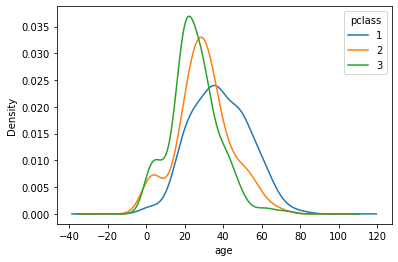

In [126]:
#方法一 plot方法
text.Age[text.Pclass == 1].plot(kind='kde') #通过字典的键值来索引
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),title='pclass',loc="best")

【参考】[matplotlib中plt.legend等的使用方法](https://www.cnblogs.com/lfri/p/12248629.html)

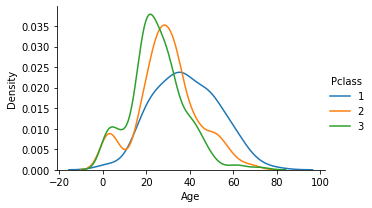

In [135]:
#方法二 sns.FacetGrid().map(sns.kedeplot)的方法
age_facet = sns.FacetGrid(text, hue="Pclass",aspect=1.5) 
age_facet.map(sns.kdeplot,'Age') 
age_facet.add_legend()
age_facet.set_ylabels('Density')

【分析】3等仓20岁左右的人员比较密集，2等仓28岁左右的人员比较密集，3等仓38岁左右的人员比较密集，考虑到仓位等级和票价的关系，可以认为40岁左右的人社会地位普遍较高，买得起好的仓位。不过“莫欺少年穷”，说不定过个几年少年摇身一变成土豪呢?


【思考】上面所有可视化的例子做一个总体的分析，你看看你能不能有自己发现

【思考题回答】从上面可视化的例子可以看出，可视化要结合数据的特点和研究目标来选择合适的图。比如说连续数值型的，如Age、Fare可以选择折线图，以其为自变量分析。柱状图比较适合离散变量，以离散变量为自变量分析。研究相互关系可以考虑用散点图和箱形图，其中散点图适合数值型，可以直观看出线性关系；箱形图适合类别型，可以直观看出数据分散情况。以上多是针对两个变量的研究，要是有额外的研究变量，可以分面网格，比较适合类别型数据。



【总结】到这里，我们的可视化就告一段落啦，如果你对数据可视化极其感兴趣，你还可以了解一下其他可视化模块，如：pyecharts，bokeh等。

如果你在工作中使用数据可视化，你必须知道数据可视化最大的作用不是炫酷，而是最快最直观的理解数据要表达什么，你觉得呢？